In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [78]:
import matplotlib.pyplot as plt

In [79]:
import warnings

In [80]:
warnings.filterwarnings("ignore") 

## Content

- **Introduction**


- **Installing and Importing**


- **Loading Dataset using seaborn**


- **Plots using Seaborn**
    - Histogram
    - KDE Plot
    - Scatterplot
    - Joint Plot
    - Pair Plot


- **Categorical Plots**
    - Count Plot
    - Box Plot
    - Voilin Plot


- **Finding correlations among attributes**
    - `corr()`
    - Heat Map


- **Choosing right visualization for a given purpose**


- **Use Case: Visualizing Tips Dataset**


In [4]:
iris = sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
type(iris)

pandas.core.frame.DataFrame

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.describe(include="object")

,species
count,150
unique,3
top,setosa
freq,50


In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

# histogram | 

#### checks the general form \ distribution 

In [14]:
from matplotlib.pyplot import figure

In [15]:
sns.set(font_scale = 1)

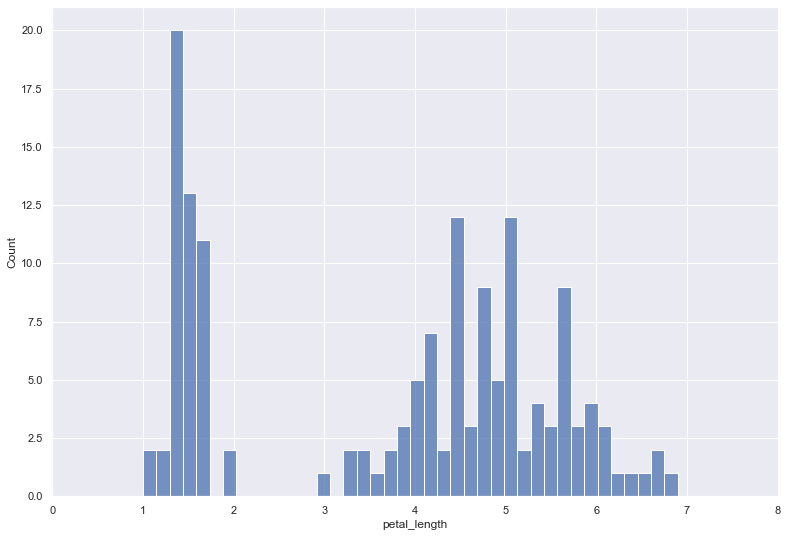

In [16]:
plt.figure(figsize=(13,9))
sns.histplot(iris["petal_length"],bins = 40)



plt.xticks(np.arange(0,9,1))
plt.show()


In [17]:

# sns.set(font_scale = 2)

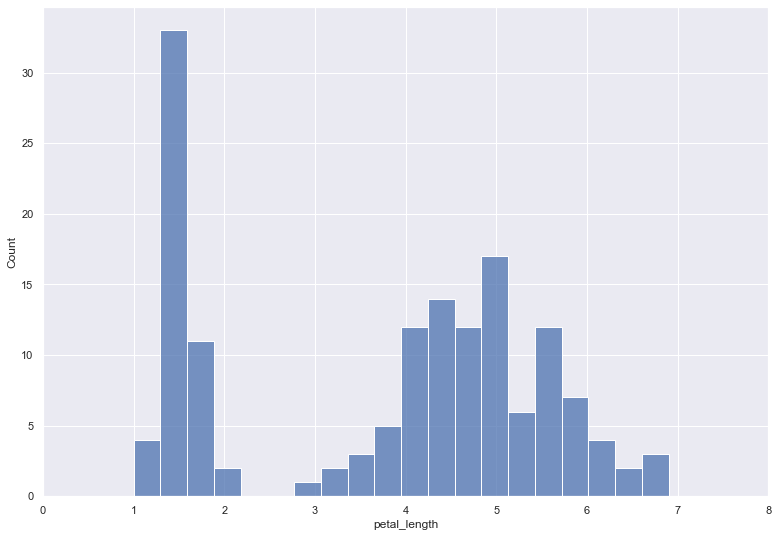

In [18]:
plt.figure(figsize=(13,9))
sns.histplot(iris["petal_length"],bins = 20)


plt.xticks(np.arange(0,9,1))
plt.show()


# kde plot

- `seaborn` is built on top of `matplotlib`

- It has **some features** (not all) that are an **enhancement** over `matplotlib.pyplot`


## Kernel Density Estimate (KDE) Plot

- instead of bars, KDE represents data using a **continuous probability density curve**


#### Why do we even need KDE plots?

- Compared to histogram, KDE produces a plot which is **less cluttered** and **more interpretable**. Especially, when drawing multiple distributions. 



In [19]:
# sns.set(font_scale = 2)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

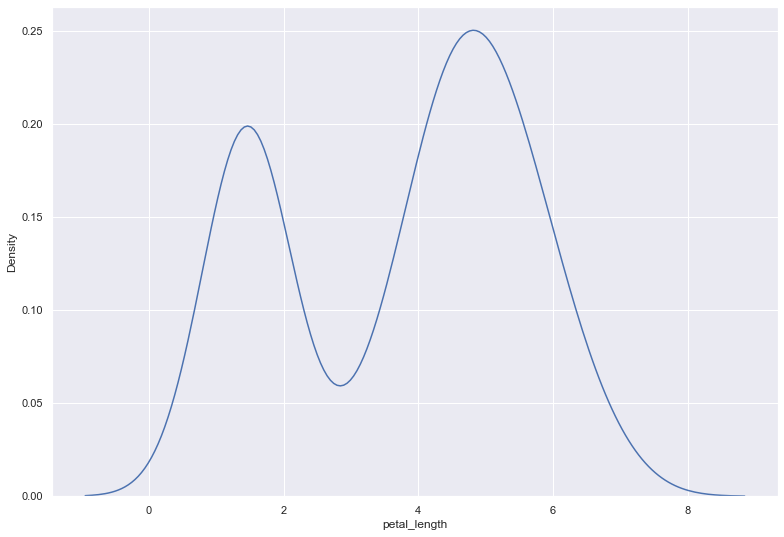

In [20]:
plt.figure(figsize=(13,9))

sns.kdeplot(iris["petal_length"])

# scatter plot


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

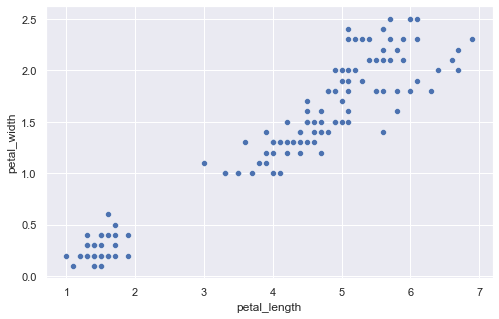

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = iris["petal_length"], y = iris["petal_width"],)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

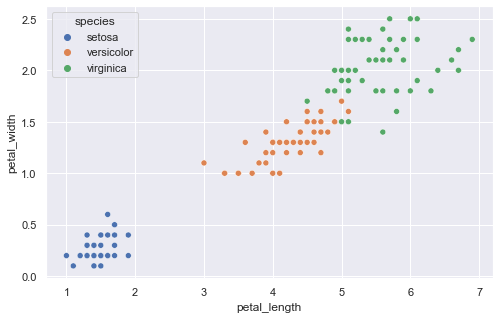

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = iris["petal_length"], y = iris["petal_width"], hue= iris["species"])


In [23]:
# 3 different clusters | 

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

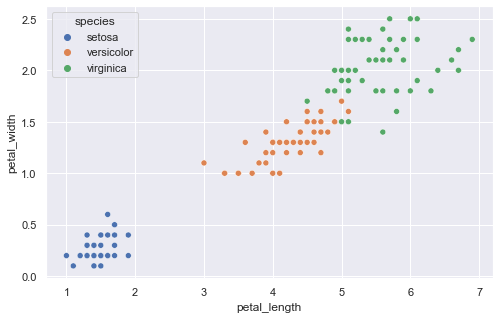

In [24]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = "petal_length", y = "petal_width", data= iris , hue = "species")


##### scatter plot using matplotlib

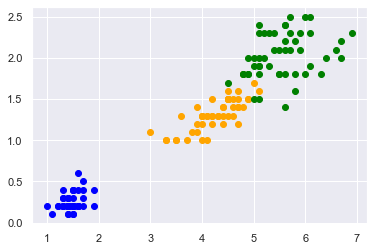

In [25]:
setosa = iris[iris['species'] == 'setosa']
versicolor = iris[iris['species'] == 'versicolor']
virginica = iris[iris['species'] == 'virginica']

plt.scatter(x=setosa['petal_length'], y=setosa['petal_width'], c = 'blue')
plt.scatter(x=versicolor['petal_length'], y=versicolor['petal_width'], c = 'orange')
plt.scatter(x=virginica['petal_length'], y=virginica['petal_width'], c = 'green')

plt.show()




# Joint Plot

- It draws a plot of two variables 


- It shows scatter, histogram and KDE graphs in the same plot.


- We can select from different values for **parameter `kind`** and it **will plot accordingly**
    - "scatter" | "kde" | "hist" | "hex" | "reg" | "resid"


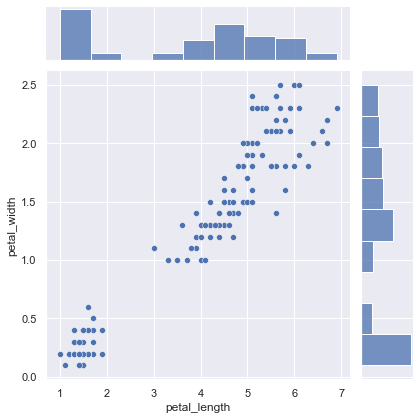

In [26]:
sns.jointplot(x = "petal_length", y = "petal_width", data = iris)

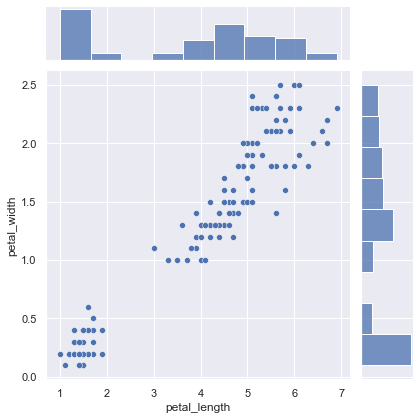

In [27]:
sns.jointplot(x = "petal_length", y = "petal_width", data = iris, kind= "scatter")

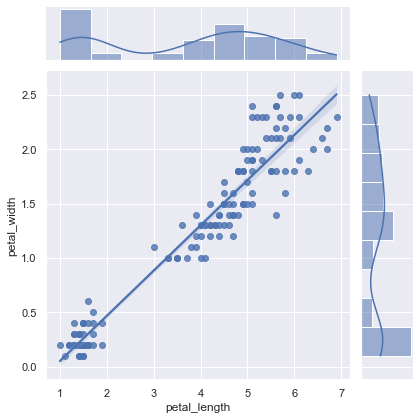

In [28]:
sns.jointplot(x = "petal_length", y = "petal_width", data = iris, kind= "reg")


# reg : regression  | line fit  | kde | histogram 


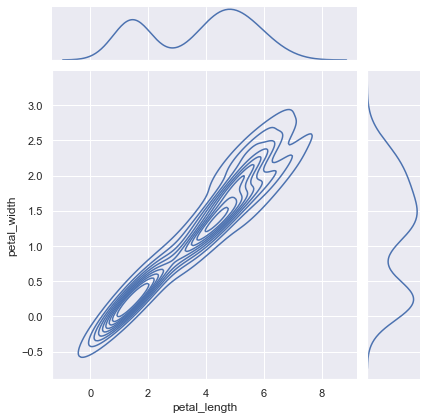

In [29]:
sns.jointplot(x = "petal_length", y = "petal_width", data = iris, kind= "kde")

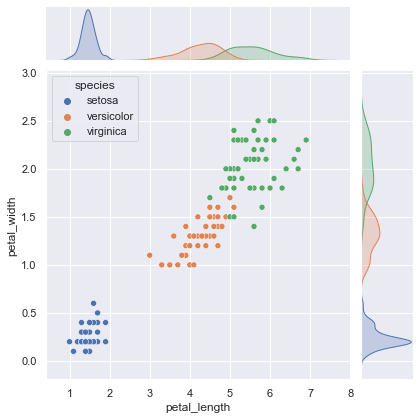

In [30]:
sns.jointplot(x = "petal_length", y = "petal_width", data = iris, hue = "species")

## Pair Plot

- `pairplot()` in `seaborn` creates a **grid of Axes by default**


- Each numeric attribute in `data` is shared across the y-axes across a single row and the x-axes across a single column. 


- It displays a **scatterplot between each pair of attributes in the data** with different **hue** for each category


#### Since, the diagonal plots belong to same attribute at both x and y axis, they are treated differently

- A univariate distribution plot is drawn to show the marginal distribution of the data in each column.


In [31]:
import math

In [32]:
math.comb(4,2)

6

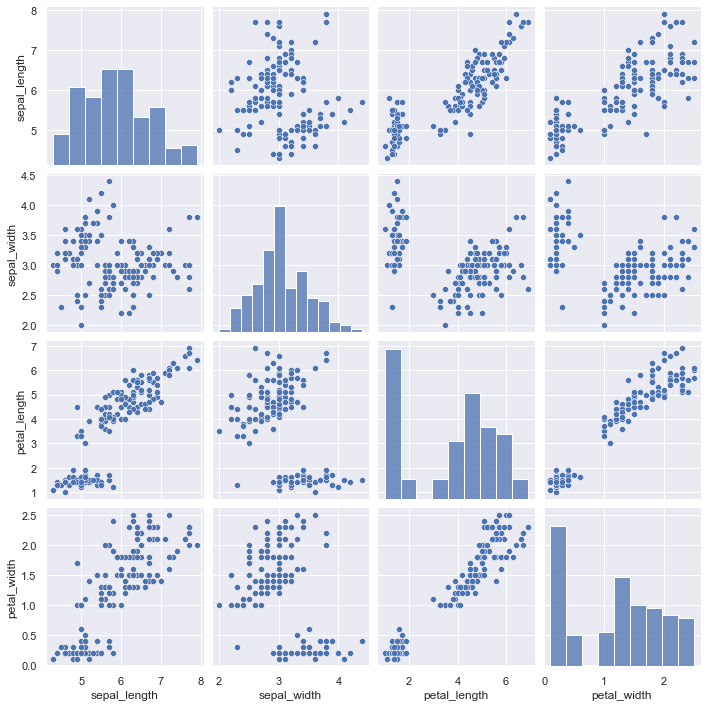

In [33]:
sns.pairplot(data = iris)

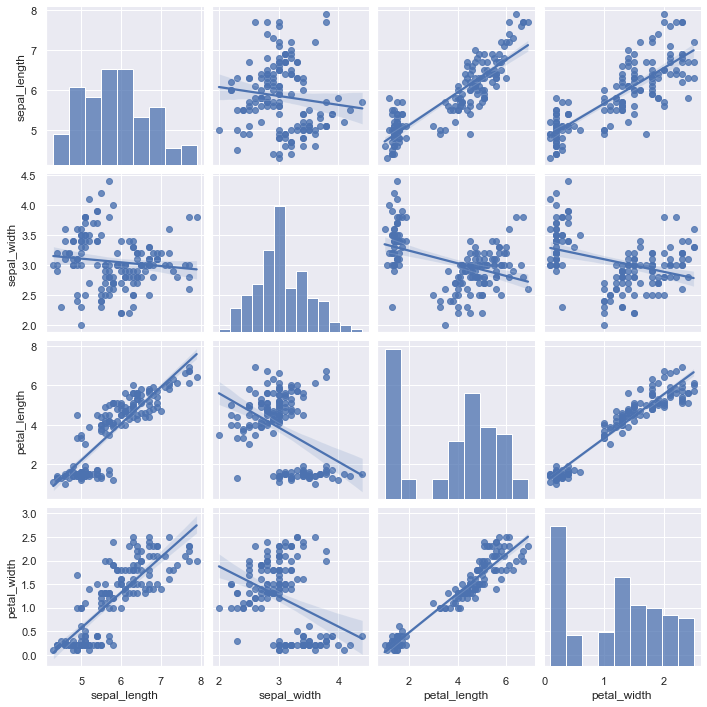

In [34]:
sns.pairplot(data = iris, kind="reg")

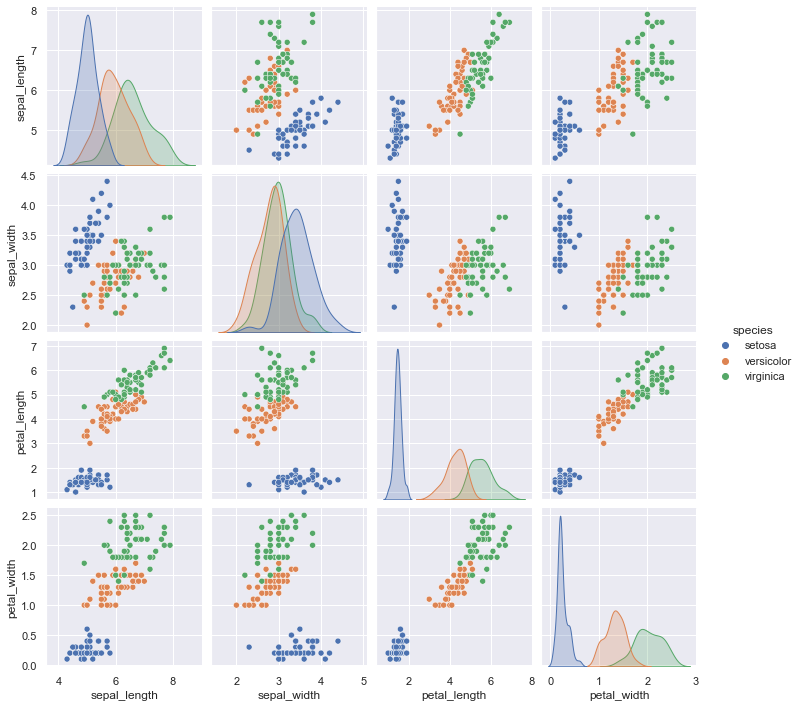

In [35]:
sns.pairplot(data = iris, hue = "species")

***

## Categorical Plots

- Categorical Plots are the **plots based on categories**



### Count Plot


- It plots a simple bar graph displaying **count of datapoints (rows) belonging to each category**


- We provide **column label on x-axis**


- **Count of data** (no. of flowers) **belonging to each category** in the column is **on y-axis**



<AxesSubplot:xlabel='species', ylabel='count'>

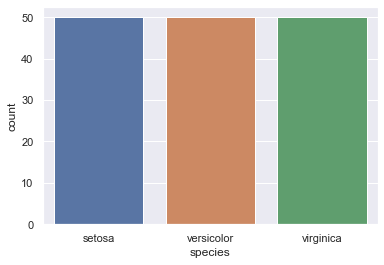

In [36]:
sns.countplot(x = iris["species"])

<AxesSubplot:xlabel='species', ylabel='count'>

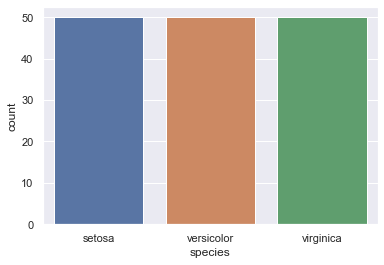

In [37]:
sns.countplot(x = "species" , data = iris)



### Box Plot


- A box plot or **box-and-whisker plot** shows the **distribution of quantitative data** in a way that **facilitates comparisons between attributes** or **across levels** of a categorical attribute. 


- The **box** shows the **quartiles** of the dataset 


- While the **whiskers** extend to show the **rest of the distribution**


- Except for points that are determined to be "outliers" using a method that is a function of the **inter-quartile range**.




- Box plot shows distribution of numerical data and skewness through displaying the **data percentiles**, called **quartiles**


#### Box plots show the five-number summary of data:
1. Minimum score, 
2. first (lower) quartile 
3. Median
4. Third (upper) quartile
5. maximum score

#### Minimum Score

- It is the **lowest value**, excluding outliers 

- It is shown at the **end of bottom whisker**

#### Lower Quartile

- **25% of values fall below the lower quartile value**

- It is also known as the **first quartile**.

#### Median

- Median marks the **mid-point of the data** 

- It is shown by the **line that divides the box into two parts**

- It is sometimes known as the **second quartile**. 

- **Half the scores are greater than or equal to this value and half are less**.

#### Upper Quartile

- **75% of the values fall below the upper quartile value**

- It is also known as the **third quartile**. 

- So, **25% of data are above this value**.

#### Maximum Score

- It is the **highest value**, excluding outliers 

- It is shown at the **end of upper whisker**.

#### Whiskers

- The upper and lower whiskers represent **values outside the middle 50%**

- That is, the **lower 25% of values** and the **upper 25% of values**.

#### Interquartile Range (or IQR)

- This is the box plot showing the **middle 50% of scores** 

- It is the **range between the 25th and 75th percentile**.



<AxesSubplot:xlabel='species', ylabel='petal_length'>

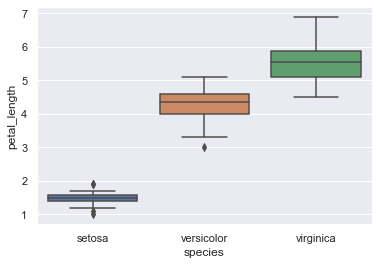

In [38]:
sns.boxplot(x = "species", y = "petal_length" , data = iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

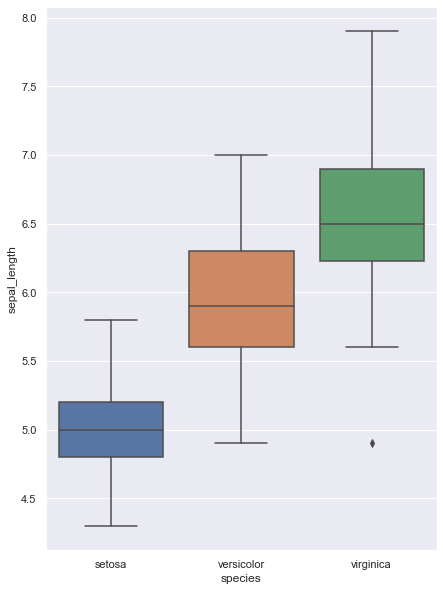

In [42]:
plt.figure(figsize=(7,10))
sns.boxplot(x = "species", y = "sepal_length" , data = iris)


#### Each species' box plot shows:

- what is the **lowest `sepal_length`** in data for that species

- what is the **25th percentile (lower quartile) value of `sepal_length`** for that species

- what is the **median `sepal_length`** in data for that species

- what is the **75th percentile (upper quartile) value of `sepal_length`** for that species

- what is the **highest `sepal_length`** in data for that species


#### Whiskers show the

- **`sepal_length` outside the middle 50% of values**

- The **lower 25% of `sepal_length`** and the **upper 25% of `sepal_length`**.


### Voilin Plot

- Its a **combination of Box Plot and Distribution Plot**.


- It shows the distribution of quantitative data across several levels of categorical attribute such that those distributions can be compared. 


#### How is it different from box plot?
- In a box plot, all of the plot components correspond to actual datapoints

- Whereas, the violin plot features a KDE of the underlying distribution.



<AxesSubplot:xlabel='species', ylabel='sepal_length'>

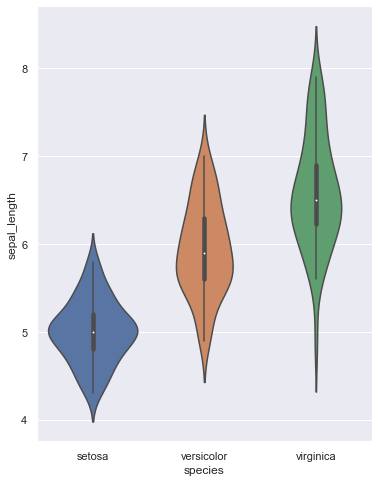

In [53]:
plt.figure(figsize=(6,8))
sns.violinplot( x = "species" , y = "sepal_length", data = iris)

 ## Finding correlations among attributes

- using `corr()`

#### But what exactly is a correlation?

- Two variables are correlated when **they change in same/opposite direction**



In [46]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

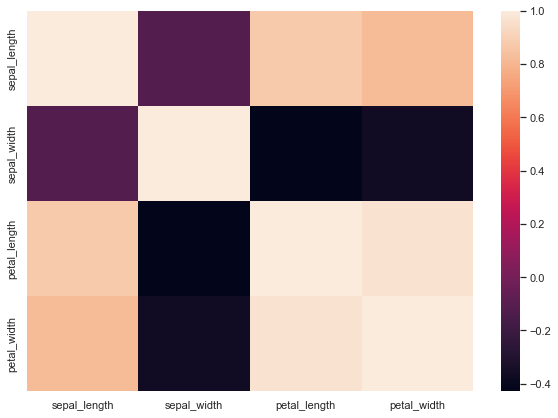

In [58]:
plt.figure(figsize=(10,7))
sns.heatmap( iris.corr() )


<AxesSubplot:>

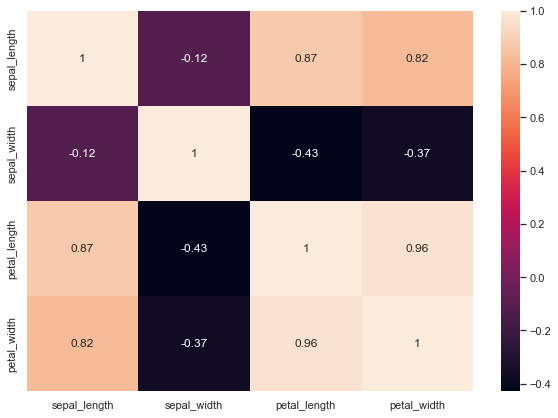

In [59]:
plt.figure(figsize=(10,7))
sns.heatmap( iris.corr(), annot=True )


In [62]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [67]:
plt.colormaps()

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

<AxesSubplot:>

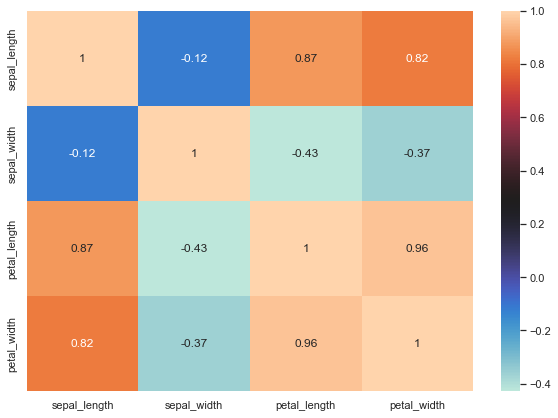

In [74]:
plt.figure(figsize=(10,7))
sns.heatmap( iris.corr(), annot=True ,cmap = "icefire")


# Choosing right visualization for a given purpose

- There's a whole bunch of charts and plots we've seen
    - Bar chart
    - Historgam
    - Box Plot
    - Violin Plot
    - Scatterplot
    - Count Plot
    - Heat Map    

- But we always need to **select the right plot for every purpose**

#### What is the right chart to use for a given problem?

- There are certain **thumb rules** that we need to consider


#### Now, What exactly is the process of selecting the right chart?

- First you need to look at what is the type of variable you're dealing with


#### Let's divide this step in into:

1. 1-Dimensional : 
                      === one variable -- dist(numerical), categorical(count) , box plot
2. 2-Dimensional : 
                      === two variable 
                      -- numerical and numerical (scatter plot)
                      -- categorical and categorical ()
                      --  categorical and numerical (box , violin or count/bar)
                    
3. Multi-Dimensional:
                      === :
                      stacked bar plot
                      scatter plot with hue(color coding) (numeric,numeric,categorical)
                      surface plot (3D)
                      
                      
4. 2D viz - multi varialbe : pairplot / heatmap



### 1-Dimensional Visualization


#### Now, Which plot to use if the variable is continuous (numeric)?

- **Histogram** ---> To see **distribution** of that continuous variable

- **Box Plot** ---> To see the **inter-quartile range of values** of that continuous variable

#### For example: What we saw with `petal_length` above:

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

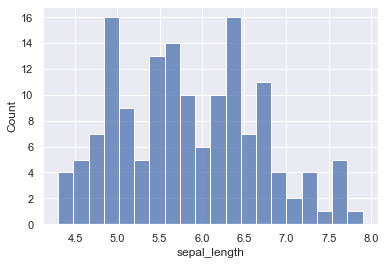

In [75]:
sns.histplot(iris["sepal_length"], bins = 20)

<AxesSubplot:ylabel='sepal_length'>

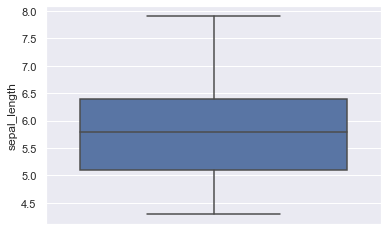

In [83]:
sns.boxplot(y = "sepal_length", data= iris)

<AxesSubplot:xlabel='sepal_length'>

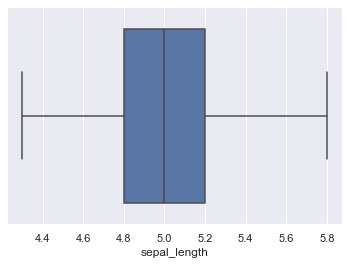

In [86]:
sns.boxplot(x = iris["sepal_length"].loc[iris["species"]=="setosa"])

<AxesSubplot:xlabel='species', ylabel='count'>

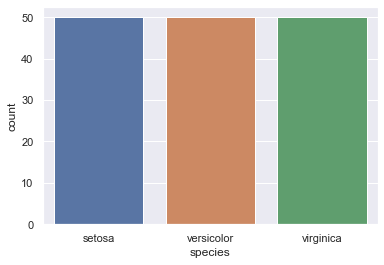

In [87]:
sns.countplot(data= iris , x = "species")

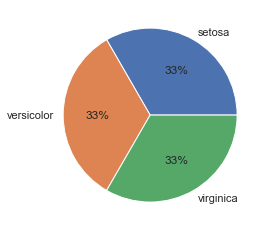

In [88]:
n_setosa = iris[iris['species'] == 'setosa'].shape[0]  # We are getting the number of datapoints in each species
n_versicolor = iris[iris['species'] == 'versicolor'].shape[0]
n_virginica = iris[iris['species'] == 'virginica'].shape[0]

data = [n_setosa, n_versicolor, n_virginica]
labels=['setosa','versicolor','virginica']

plt.pie(data,
       labels=labels,
       autopct='%.0f%%') # To show the portions in %ages

plt.show()

### 2-Dimensional Visualization

- to check the relationship b/w 2 variables

- Its a **Bi-Variate Analysis**

#### Which chart will we use if both variables are continuous (numeric)?

- **Scatter Plot** ---> To see how the 2 continuous variables are **dependent on each other or vary with each other**

- **Line Chart** ---> To see the **approximate relationship (dependency) b/w the 2 variables** represented by a line




<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

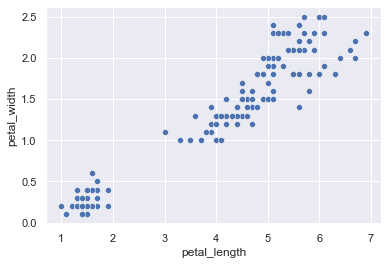

In [89]:
sns.scatterplot(x = "petal_length", y = "petal_width" , data = iris)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

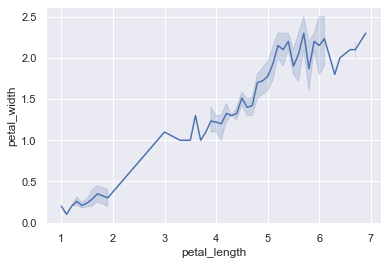

In [90]:
sns.lineplot(x = "petal_length", y = "petal_width" , data = iris)

#### Now, Which chart to use when we have 1 continuous and 1 discrete variable?

- **Box Plot** ---> To see **distribution of numeric variable across each category of categorical variable**



<AxesSubplot:xlabel='species', ylabel='sepal_width'>

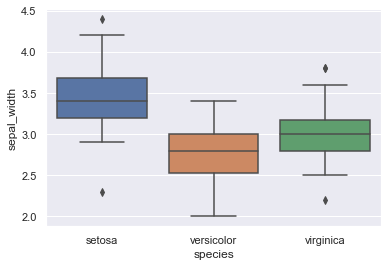

In [92]:
sns.boxplot(x = "species" , y= "sepal_width" , data = iris)

#### Now, What if both our variables are categorical?

- We can use a Bar Chart (Stacked or Dodged)

#### For example: 

- Let's say we have some employees data of a company. 

- We want to check **how many employees are there in each department - Engg, HR, Operations, Sales**

- Now, we want to check **how many Males and Females are there in each department**

- A **Stacked/Dodged Bar Chart can be appropriately used here**

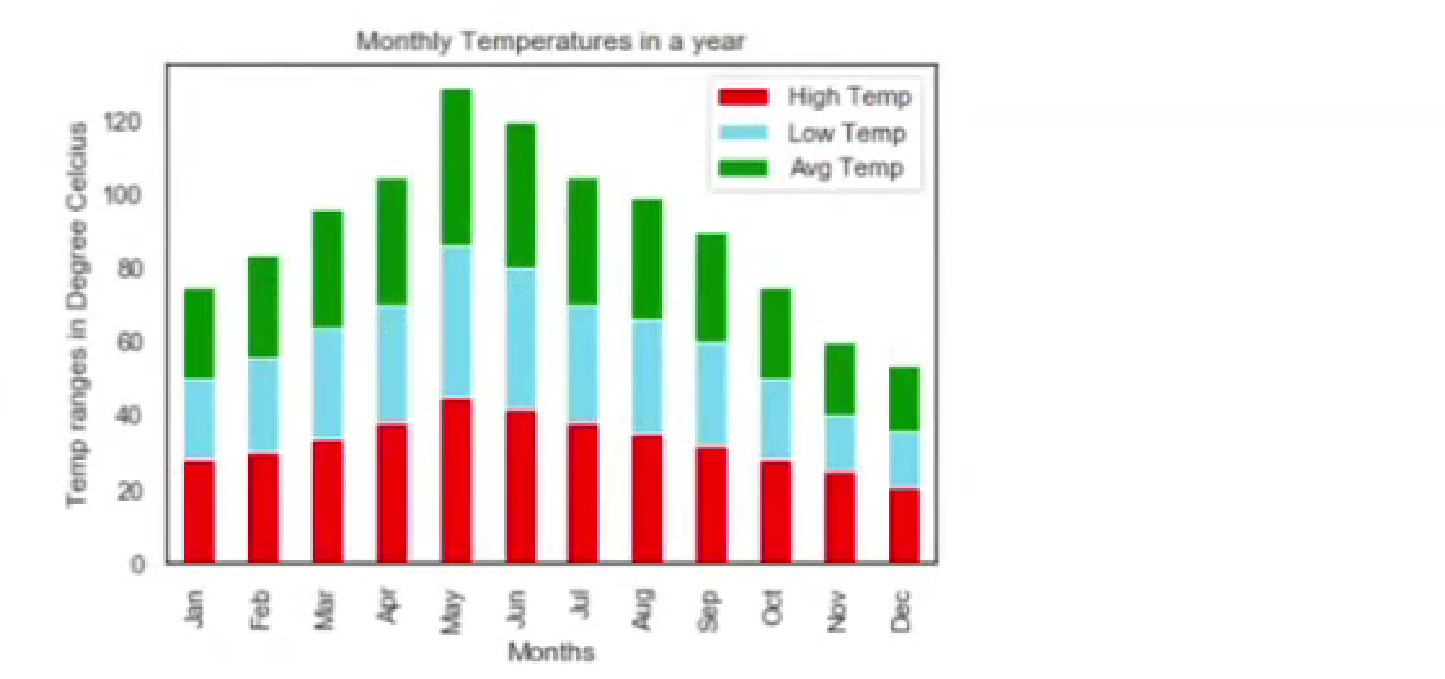

### Multi-Dimensional Visualization

#### Let's start with 2 dimensions, i.e., 2 variables, and then we'll add more dimensions to the plot



<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

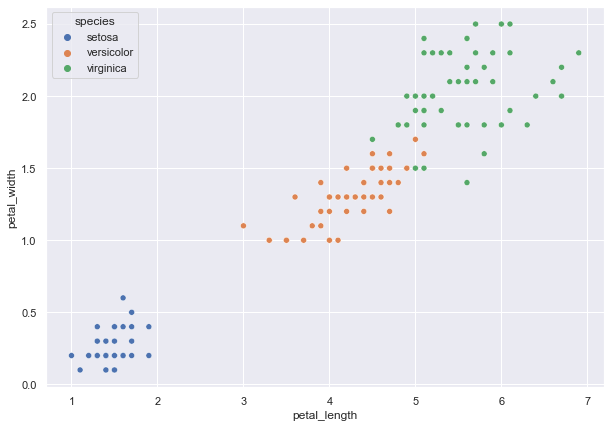

In [95]:
plt.figure(figsize=(10,7))
sns.scatterplot(y = "petal_width", x = "petal_length" , data = iris , hue = "species")

- Different species are now represented by different colours


- We had a 2-D Scatter Plot b/w `petal_length` and `petal_width`

- The, we added **`species` as a 3rd dimension** using the **colour**


#### Now, It's a multi-dimensional plot


#### We can also add this dimension of species in our Line Plot

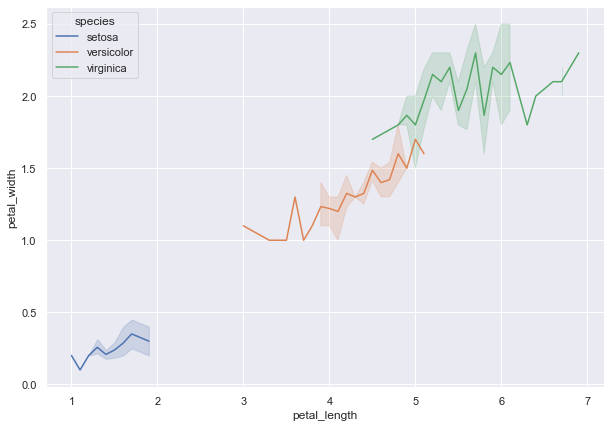

In [97]:
plt.figure(figsize=(10,7))
sns.lineplot(x= 'petal_length', y= 'petal_width', data = iris, hue='species')
plt.show()

In [98]:
tips = sns.load_dataset("tips")

In [99]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
tips.shape

(244, 7)

In [107]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [109]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [110]:
tips.describe(include="category")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [111]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

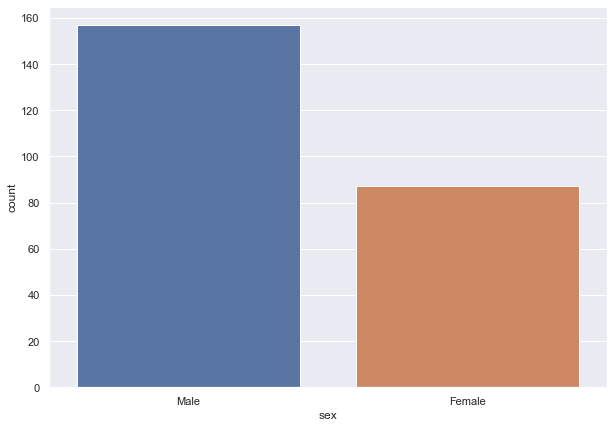

In [123]:
plt.figure(figsize=(10,7))


sns.countplot(x = tips["sex"])

In [113]:
tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

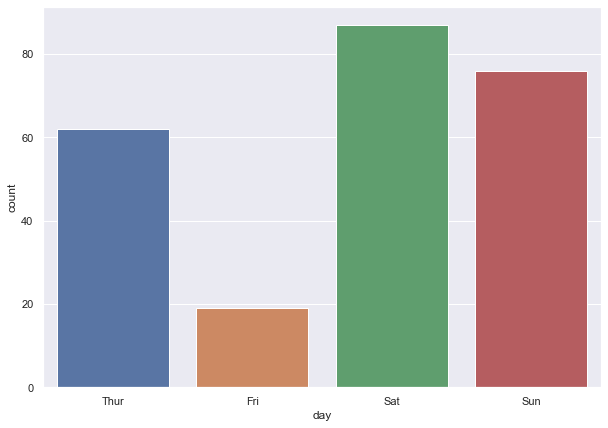

In [124]:
plt.figure(figsize=(10,7))

sns.countplot(tips["day"])

<AxesSubplot:xlabel='day', ylabel='count'>

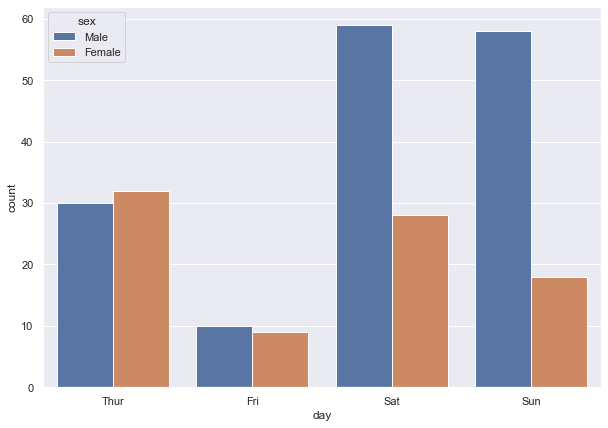

In [125]:
plt.figure(figsize=(10,7))

sns.countplot(x = "day" , hue = "sex" , data = tips )

In [119]:
# twp categorical , one numerical 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

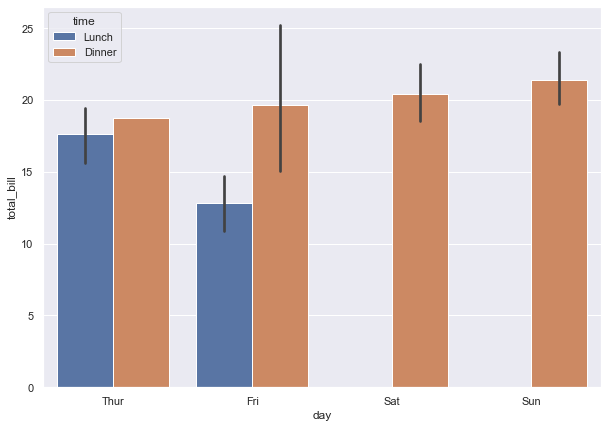

In [126]:
plt.figure(figsize=(10,7))

sns.barplot(x = "day" , y = "total_bill" , data = tips , hue = "time")

<AxesSubplot:xlabel='time', ylabel='total_bill'>

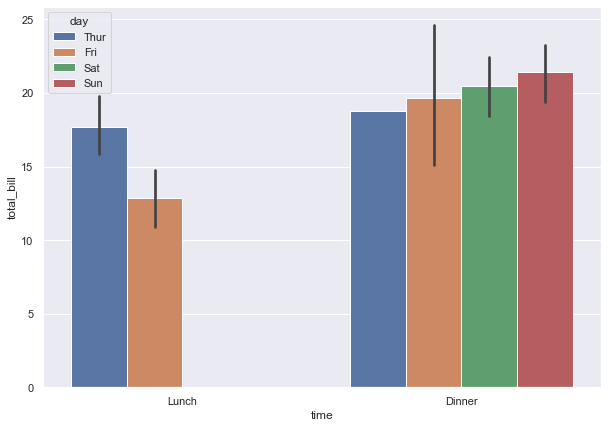

In [127]:
plt.figure(figsize=(10,7))

sns.barplot(x = "time" , y = "total_bill" , data = tips , hue = "day")

In [166]:
titanic = sns.load_dataset("titanic")

In [167]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [168]:
titanic.shape

(891, 15)

In [169]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [174]:
titanic.describe(include=["object","bool" ])

,sex,embarked,who,adult_male,embark_town,alive,alone
count,891,889,891,891,889,891,891
unique,2,3,3,2,3,2,2
top,male,S,man,True,Southampton,no,True
freq,577,644,537,537,644,549,537


In [178]:
titanic["embarked"].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [179]:
titanic["who"].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [196]:
titanic.drop("survived",axis = 1,inplace=True)

In [230]:
titanic.tail(25)

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
866,2,female,27.0,1,0,13.8583,C,Second,woman,False,NaN,Cherbourg,yes,False
867,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
868,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
869,3,male,4.0,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
870,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
871,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
873,3,male,47.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True
874,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
875,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True


<AxesSubplot:xlabel='sex', ylabel='count'>

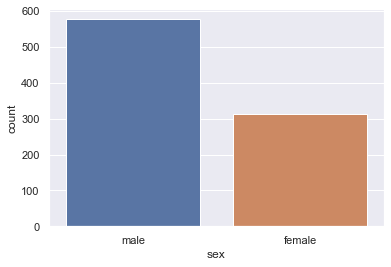

In [199]:
sns.countplot(x="sex",data =titanic)

<AxesSubplot:xlabel='class', ylabel='count'>

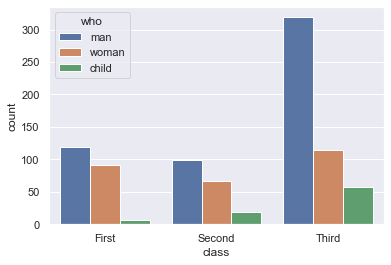

In [212]:
sns.countplot(x = "class",data =titanic, hue= "who")

<AxesSubplot:xlabel='age', ylabel='Density'>

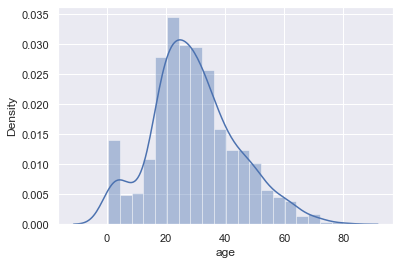

In [227]:
sns.distplot(a = titanic["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

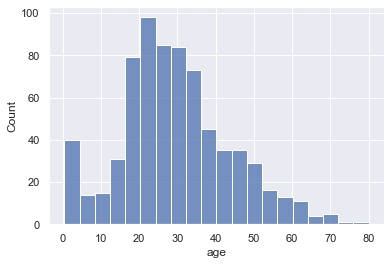

In [218]:
sns.histplot(x = "age",data =titanic )

<AxesSubplot:xlabel='who', ylabel='count'>

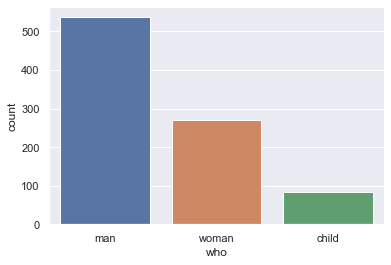

In [220]:
sns.countplot(x = "who",data=titanic)

<AxesSubplot:xlabel='who', ylabel='count'>

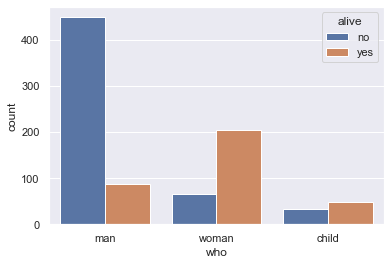

In [222]:
sns.countplot(x = "who",data=titanic, hue="alive")

<AxesSubplot:xlabel='age', ylabel='Density'>

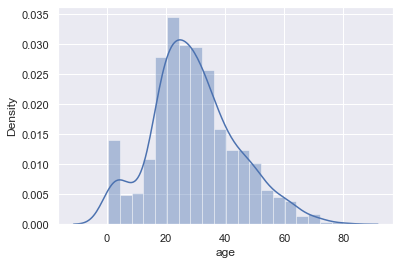

In [232]:
titanic.loc[700:720]

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
700,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
701,1,male,35.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
702,3,female,18.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
703,3,male,25.0,0,0,7.7417,Q,Third,man,True,NaN,Queenstown,no,True
704,3,male,26.0,1,0,7.8542,S,Third,man,True,NaN,Southampton,no,False
705,2,male,39.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
706,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,yes,True
707,1,male,42.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
708,1,female,22.0,0,0,151.5500,S,First,woman,False,NaN,Southampton,yes,True
709,3,male,NaN,1,1,15.2458,C,Third,man,True,NaN,Cherbourg,yes,False


In [231]:
titanic.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [235]:
children  = titanic.loc[(titanic["who"]=="child")]

In [236]:
children

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,2,female,14.00,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,3,female,14.00,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
852,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False
869,3,male,4.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False


<AxesSubplot:xlabel='alive', ylabel='count'>

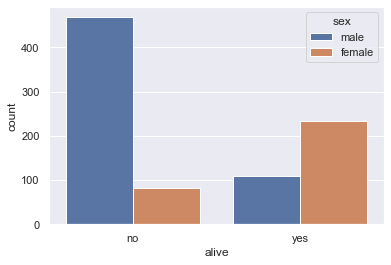

In [238]:
sns.countplot(x = "alive", data = titanic, hue="sex")

In [251]:
titanic["deck"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:xlabel='deck', ylabel='count'>

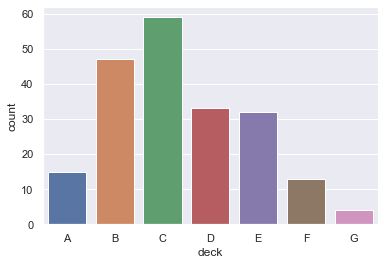

In [253]:
sns.countplot(data =titanic, x= "deck")

<AxesSubplot:xlabel='deck', ylabel='count'>

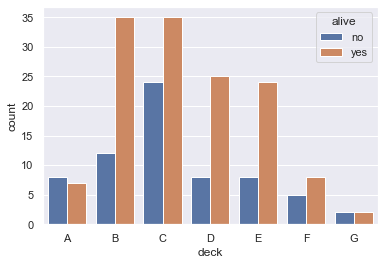

In [257]:
sns.countplot(data =titanic, x= "deck", hue = "alive")

<AxesSubplot:xlabel='class', ylabel='age'>

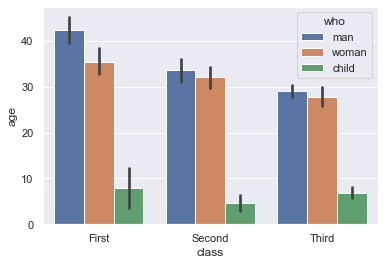

In [250]:
sns.barplot(y = "age" ,x = "class", hue="who",data =titanic)

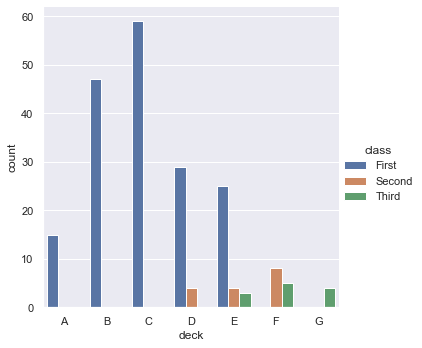

In [261]:
sns.catplot(data= titanic, x="deck" , hue ="class", kind = "count")